# Ex4

In [30]:
import torch
from torch.utils.data import Dataset,DataLoader
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
# local imports
import MNIST_dataloader
from scipy import linalg
import os
import bokeh
import Fast_MRI_dataloader 
from ISTA import ISTAI_main
PATH = os.path.join(os.getcwd(),'Fast_MRI_Knee')
print('Folders in the Fast_MRI_Knee:',os.listdir(PATH)) # os.listdir(PATH)
# Batch size
batch_size = 64
# Load train and test
# train_loader, test_loader = MNIST_dataloader.create_dataloaders(PATH, batch_size)
import warnings
warnings.filterwarnings("ignore") # Turn off warnings

PATH = os.path.join(os.getcwd(),'Fast_MRI_Knee')
print(PATH)

train_loader, test_loader = Fast_MRI_dataloader.create_dataloaders(PATH, batch_size)

def calculate_full_kspace(input):
    return(torch.fft.fftshift(torch.fft.fft2(input)))

def get_partial_kspace(fks,M): # get masked k-space
    return(torch.mul(fks,M)) # multiply

def get_accelerated_measurement_image(pks):
    return(torch.fft.ifft2(torch.fft.ifftshift(pks)))

Folders in the Fast_MRI_Knee: ['MNIST', 'test', 'train']
d:\01_School\Q4_5LSL0_MachineLearningForsignalProcessing\SignalProcessing\5LSL0_HW\Assignment4\Code - for students\Fast_MRI_Knee


In [28]:
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    fkspace = calculate_full_kspace(gt)            # ground full k-space
    pks = get_partial_kspace(fkspace,M)            # get partial k-space
    amimg = get_accelerated_measurement_image(pks) # get M ⊙ (FX + N)
    continue

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


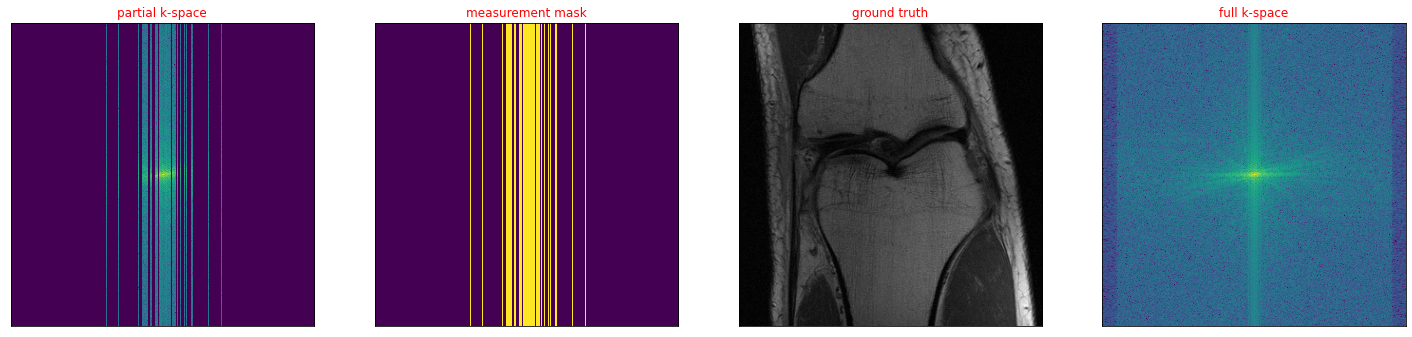

In [29]:
pkspace_plot_friendly = torch.log(torch.abs(pks[0,:,:])+1e-20)
fkspace_plot_friendly = torch.log(torch.abs(fkspace[0,:,:])+1e-20) # this k-space is frquency domain with complex, and + 1e-20 fo compensate.

# %% plot the last example
kspace_plot_friendly = torch.log(torch.abs(kspace[0,:,:])+1e-20)

plt.figure(figsize = (25,35))
plt.subplot(1,4,1)
plt.imshow(kspace_plot_friendly,vmin=-2.3,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space',color='red')

plt.subplot(1,4,2)
plt.imshow(M[0,:,:],interpolation='nearest') # mask
plt.xticks([])
plt.yticks([])
plt.title('measurement mask',color='red')

plt.subplot(1,4,3)
plt.imshow(gt[0,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('ground truth',color='red')

plt.subplot(1,4,4)
plt.imshow(fkspace_plot_friendly,vmin=-2.3,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('full k-space',color='red')

# plt.savefig("example.png",dpi=300,bbox_inches='tight')
plt.show()
plt.close()

Text(0.5, 1.0, 'transfer partial k-space to full k-space')

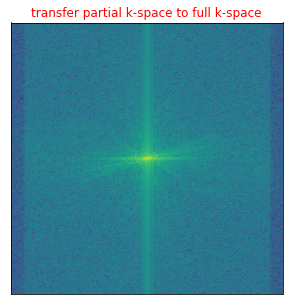

In [35]:
# transfer a known partial k-space to full k-space

tr = (torch.abs(fkspace[0,:,:])).log()

plt.figure(figsize = (5,5))
plt.imshow(tr)
plt.xticks([])
plt.yticks([])
plt.title('transfer partial k-space to full k-space',color='red')

In [ ]:
# denoise
# ISTA
# y - ground truth
# mu 
mu = 0.01
lmbd = 0.9
k = 10
shrinkage = mu*lmbd